In [162]:
conda install -c conda-forge imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: imbalanced-learn


In [163]:
pip install -U imbalanced-learn

In [164]:
!pip install lightgbm

In [165]:
!pip install xgboost

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf, linewidth=np.nan)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
train = pd.read_csv("Train_data.csv")
test = pd.read_csv("Test_data.csv")

In [4]:
print(train.head(4))

print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0 

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [6]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [8]:
train.shape

(25192, 42)

In [9]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")
     

In [11]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


<AxesSubplot:>

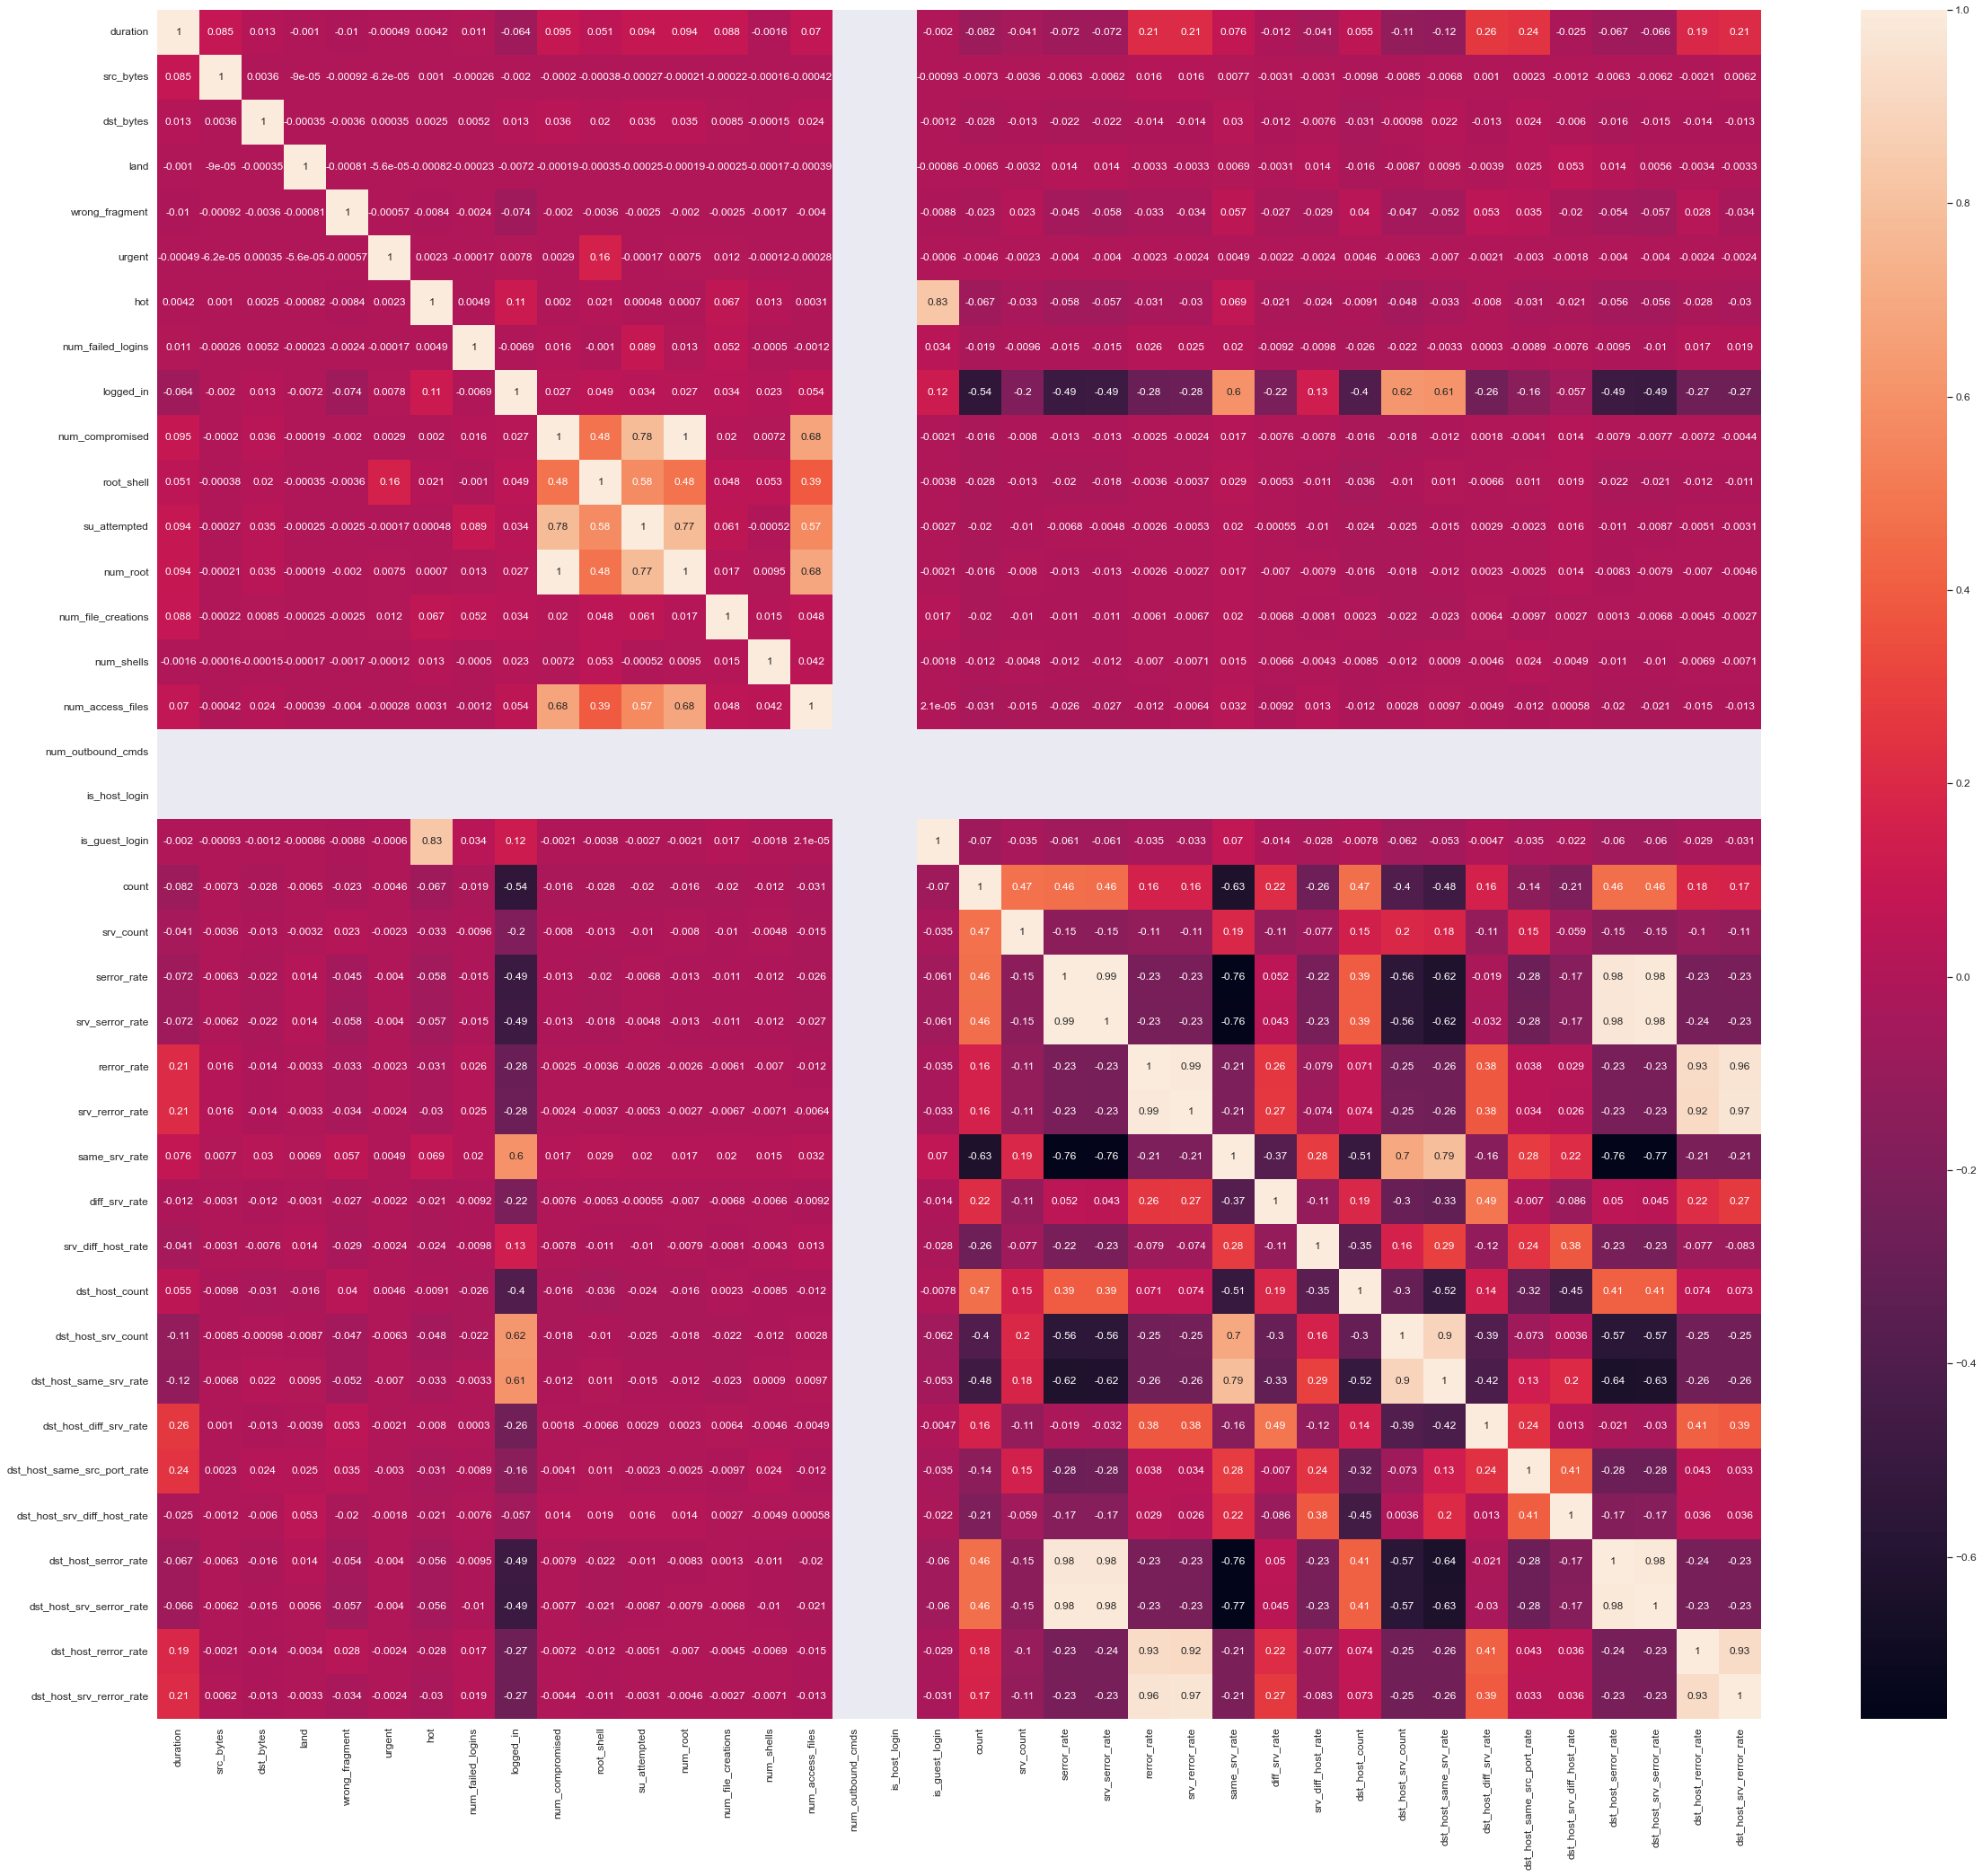

In [15]:
plt.figure(figsize=(40,35))
sns.heatmap(train.corr(), annot=True)

<AxesSubplot:xlabel='class', ylabel='count'>

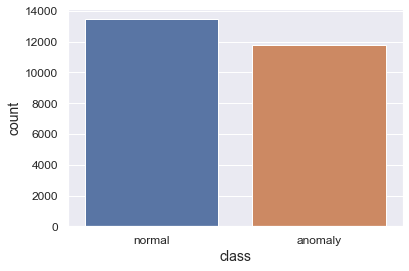

In [177]:
sns.countplot(x=train['class'])

In [178]:
print('class distribution training set: ')
print(train['class'].value_counts())

class distribution training set: 
normal     13449
anomaly    11743
Name: class, dtype: int64


In [179]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
  
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [180]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [181]:
print(train['num_outbound_cmds'].value_counts())
print(test['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64
0    22544
Name: num_outbound_cmds, dtype: int64


In [182]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [183]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [184]:
X_train=train.drop(['class'],axis=1)
Y_train=train['class']

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate']

In [186]:
X_train=X_train[selected_features]

In [187]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train = scale.fit_transform(X_train)
test= scale.fit_transform(test)

In [188]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train,train_size=0.70, random_state=2)

In [189]:
x_train.shape

(17634, 10)

In [190]:
x_test.shape

(7558, 10)

In [191]:
y_train.shape

(17634,)

In [192]:
y_test.shape

(7558,)

In [193]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [194]:
lg_train,lg_test = lg_model.score(x_train,y_train),lg_model.score(x_test,y_test)
print(f"Training Score: {lg_train}")
print(f"Testing Score: {lg_test}")

Training Score: 0.942270613587388
Testing Score: 0.9391373379200847


In [195]:
!pip install optuna

In [196]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [197]:
from sklearn.neighbors import KNeighborsClassifier

def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors',2,16,log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train,y_train)
    accuracy = classifier_obj.score(x_test,y_test)
    return accuracy

In [198]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9806827202963747], datetime_start=datetime.datetime(2023, 4, 22, 16, 37, 11, 318171), datetime_complete=datetime.datetime(2023, 4, 22, 16, 37, 13, 128287), params={'KNN_n_neighbors': 11}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [199]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train,y_train)
KNN_train,KNN_test = KNN_model.score(x_train,y_train),KNN_model.score(x_test,y_test)
print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")


Train Score: 0.9826471588975842
Test Score: 0.9806827202963747


In [200]:
from sklearn.tree import DecisionTreeClassifier

In [201]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth',2,32,log=False)
    dt_max_features = trial.suggest_int('dt_max_features',2,10,log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features,max_depth=dt_max_depth)
    classifier_obj.fit(x_train,y_train)
    accuracy = classifier_obj.score(x_test,y_test)
    return accuracy

In [202]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

FrozenTrial(number=28, state=TrialState.COMPLETE, values=[0.9953691452765282], datetime_start=datetime.datetime(2023, 4, 22, 16, 37, 20, 407275), datetime_complete=datetime.datetime(2023, 4, 22, 16, 37, 20, 470032), params={'dt_max_depth': 23, 'dt_max_features': 6}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=28, value=None)


In [203]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

Train Score: 1.0
Test Score: 0.9944429743318338


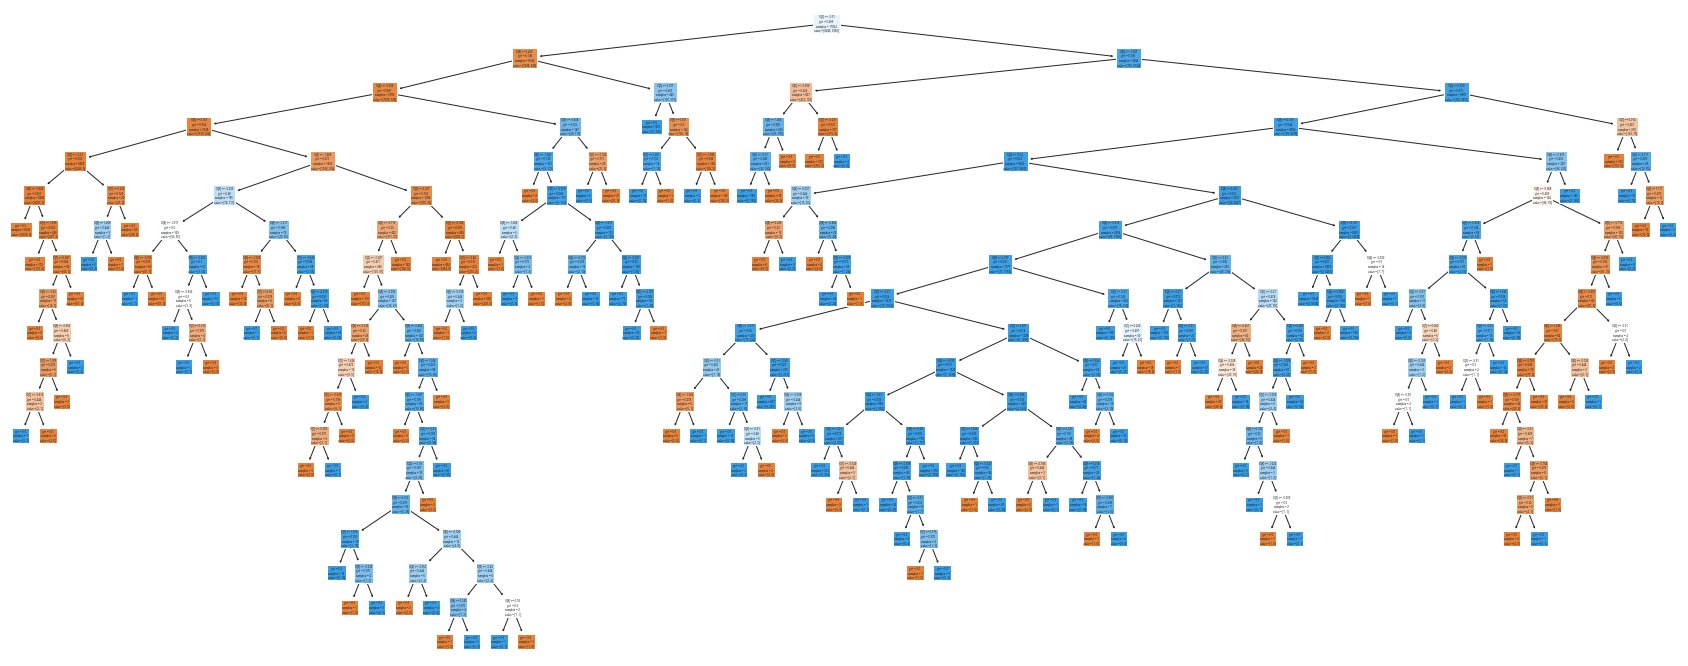

In [204]:
fig = plt.figure(figsize = (30,12))
tree.plot_tree(dt, filled=True);
plt.show()

In [205]:
from sklearn.naive_bayes import GaussianNB

def objective(trial):
    classifier_obj = GaussianNB()
    classifier_obj.fit(x_train,y_train)
    accuracy = classifier_obj.score(x_test,y_test)
    return accuracy
    
study_gnb = optuna.create_study(direction='maximize')
study_gnb.optimize(objective, n_trials=30)

print(study_gnb.best_trial)



FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.8835670812384229], datetime_start=datetime.datetime(2023, 4, 22, 16, 37, 44, 109198), datetime_complete=datetime.datetime(2023, 4, 22, 16, 37, 44, 130473), params={}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={}, trial_id=0, value=None)


In [206]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb_train, gnb_test = gnb.score(x_train,y_train), gnb.score(x_test,y_test)

print("Train score is:", gnb_train)
print("Test score is:", gnb_test)

Train score is: 0.8864693206306
Test score is: 0.8835670812384229


In [207]:
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=False)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 10, log=False)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 3, 20, log=False)
    classifier_obj = RandomForestClassifier(max_features = rf_max_features, max_depth = rf_max_depth, n_estimators = rf_n_estimators)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [208]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=30)
print(study_rf.best_trial)

FrozenTrial(number=7, state=TrialState.COMPLETE, values=[0.9966922466260916], datetime_start=datetime.datetime(2023, 4, 22, 16, 37, 45, 989718), datetime_complete=datetime.datetime(2023, 4, 22, 16, 37, 46, 352769), params={'rf_max_depth': 30, 'rf_max_features': 3, 'rf_n_estimators': 18}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'rf_max_features': IntDistribution(high=10, log=False, low=2, step=1), 'rf_n_estimators': IntDistribution(high=20, log=False, low=3, step=1)}, trial_id=7, value=None)


In [209]:
rf = RandomForestClassifier(max_features = study_rf.best_trial.params['rf_max_features'], max_depth = study_rf.best_trial.params['rf_max_depth'], n_estimators = study_rf.best_trial.params['rf_n_estimators'])
rf.fit(x_train, y_train)

rf_train, rf_test = rf.score(x_train, y_train), rf.score(x_test, y_test)

print(f"Train Score: {rf_train}")
print(f"Test Score: {rf_test}")

Train Score: 0.9997731654757854
Test Score: 0.9965599364911352


In [210]:
SKGB = GradientBoostingClassifier(random_state=42)
SKGB.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [211]:
SKGB_train, SKGB_test = SKGB.score(x_train , y_train), SKGB.score(x_test , y_test)

print(f"Training Score: {SKGB_train}")
print(f"Test Score: {SKGB_test}")

Training Score: 0.9950096404672791
Test Score: 0.9928552527123577


In [212]:
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)

LGBMClassifier(random_state=42)

In [213]:
lgb_train, lgb_test = lgb_model.score(x_train , y_train), lgb_model.score(x_test , y_test)

print(f"Training Score: {lgb_train}")
print(f"Test Score: {lgb_test}")

Training Score: 1.0
Test Score: 0.9964276263561789


In [214]:
from tabulate import tabulate
data = [["KNN", KNN_train, KNN_test], 
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", dt_train, dt_test], 
        ["Random Forest", rf_train, rf_test], 
        ["GBM", SKGB_train, SKGB_test], 
        ["light GBM", lgb_train, lgb_test],
        ["Naive Baye Model", gnb_train, gnb_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.982647 │     0.980683 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.942271 │     0.939137 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      1        │     0.994443 │
├─────────────────────┼───────────────┼──────────────┤
│ Random Forest       │      0.999773 │     0.99656  │
├─────────────────────┼───────────────┼──────────────┤
│ GBM                 │      0.99501  │     0.992855 │
├─────────────────────┼───────────────┼──────────────┤
│ light GBM           │      1        │     0.996428 │
├─────────────────────┼───────────────┼──────────────┤
│ Naive Baye Model    │      0.886469 │     0.883567 │
╘═════════════════════╧═══════════════╧══════════════╛


In [215]:
SEED = 42


dtc = DecisionTreeClassifier()

knn = KNeighborsClassifier()

# LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# GAUSSIAN NAIVE BAYES
gnb = GaussianNB()

# Train RandomForestClassifier
rfe = RandomForestClassifier(max_depth=6)

# Train LightGBM Classifier
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(random_state=SEED)


# Train Gradient-Boosting Classifier 
grb = GradientBoostingClassifier(learning_rate=1.1)

In [216]:
from sklearn.model_selection import cross_val_score
models = {}

models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc
models['Gaussian Naive Bayes Classifier']= gnb
models['KNeighborsClassifier']= knn
models['Gradient Boosting Classifier']= grb
models['Random Forest Classifier']= rfe

models['LightGBM Classifier']= lgbmc
scores = {}
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], x_train, y_train, cv=10, scoring=scorer)

In [217]:
def line(name):
  return '*'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Model Validation', line(name))

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
    print()
     

**************** LogisticRegression Model Validation ****************
Mean precision: 
 93.55 % +- 0.58

Mean recall: 
 95.62 % +- 0.6

************** DecisionTreeClassifier Model Validation **************
Mean precision: 
 99.49 % +- 0.19

Mean recall: 
 99.49 % +- 0.2

********** Gaussian Naive Bayes Classifier Model Validation **********
Mean precision: 
 85.87 % +- 1.16

Mean recall: 
 94.33 % +- 0.56

*************** KNeighborsClassifier Model Validation ***************
Mean precision: 
 98.5 % +- 0.42

Mean recall: 
 98.35 % +- 0.43

*********** Gradient Boosting Classifier Model Validation ***********
Mean precision: 
 99.4 % +- 0.19

Mean recall: 
 99.29 % +- 0.53

************* Random Forest Classifier Model Validation *************
Mean precision: 
 98.62 % +- 0.3

Mean recall: 
 99.71 % +- 0.14

**************** LightGBM Classifier Model Validation ****************
Mean precision: 
 99.53 % +- 0.19

Mean recall: 
 99.77 % +- 0.18



<AxesSubplot:>

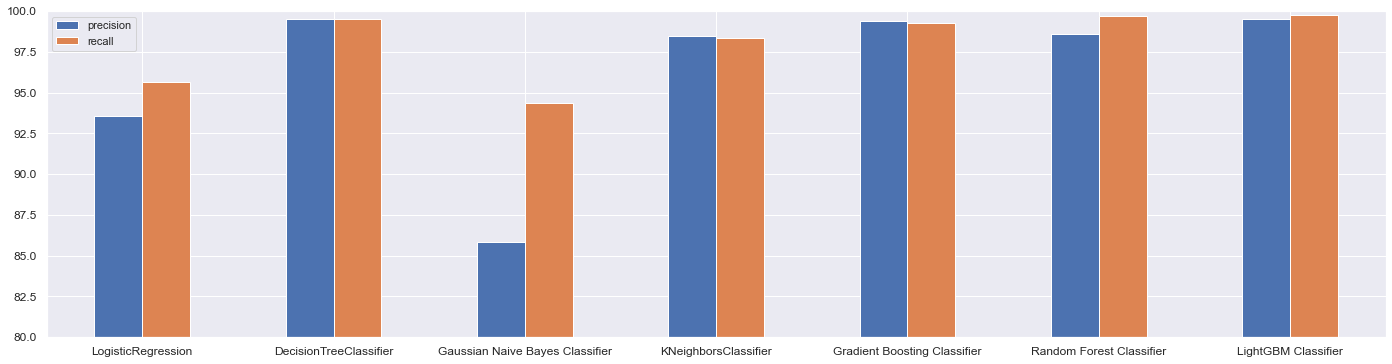

In [218]:
for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar",  ylim=[80,100], figsize=(24,6), rot=0)


In [224]:
models = {}

models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc
models['Gaussian Naive Bayes Classifier']= gnb
models['KNeighborsClassifier']= knn
models['Gradient Boosting Classifier']= grb
models['Random Forest Classifier']= rfe
models['LightGBM Classifier']= lgbmc

In [225]:
preds={}
for name in models:
    models[name].fit(x_train, y_train)
    preds[name] = models[name].predict(x_test)
print("Predictions complete.")


Predictions complete.


In [226]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))

**************** LogisticRegression Model Testing ****************
[[3220  278]
 [ 182 3878]]
----------------
              precision    recall  f1-score   support

      normal       0.95      0.92      0.93      3498
     anamoly       0.93      0.96      0.94      4060

    accuracy                           0.94      7558
   macro avg       0.94      0.94      0.94      7558
weighted avg       0.94      0.94      0.94      7558

************** DecisionTreeClassifier Model Testing **************
[[3477   21]
 [  28 4032]]
--------------
              precision    recall  f1-score   support

      normal       0.99      0.99      0.99      3498
     anamoly       0.99      0.99      0.99      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558

********** Gaussian Naive Bayes Classifier Model Testing **********
[[2865  633]
 [ 247 3813]]
----------
              precis

<AxesSubplot:>

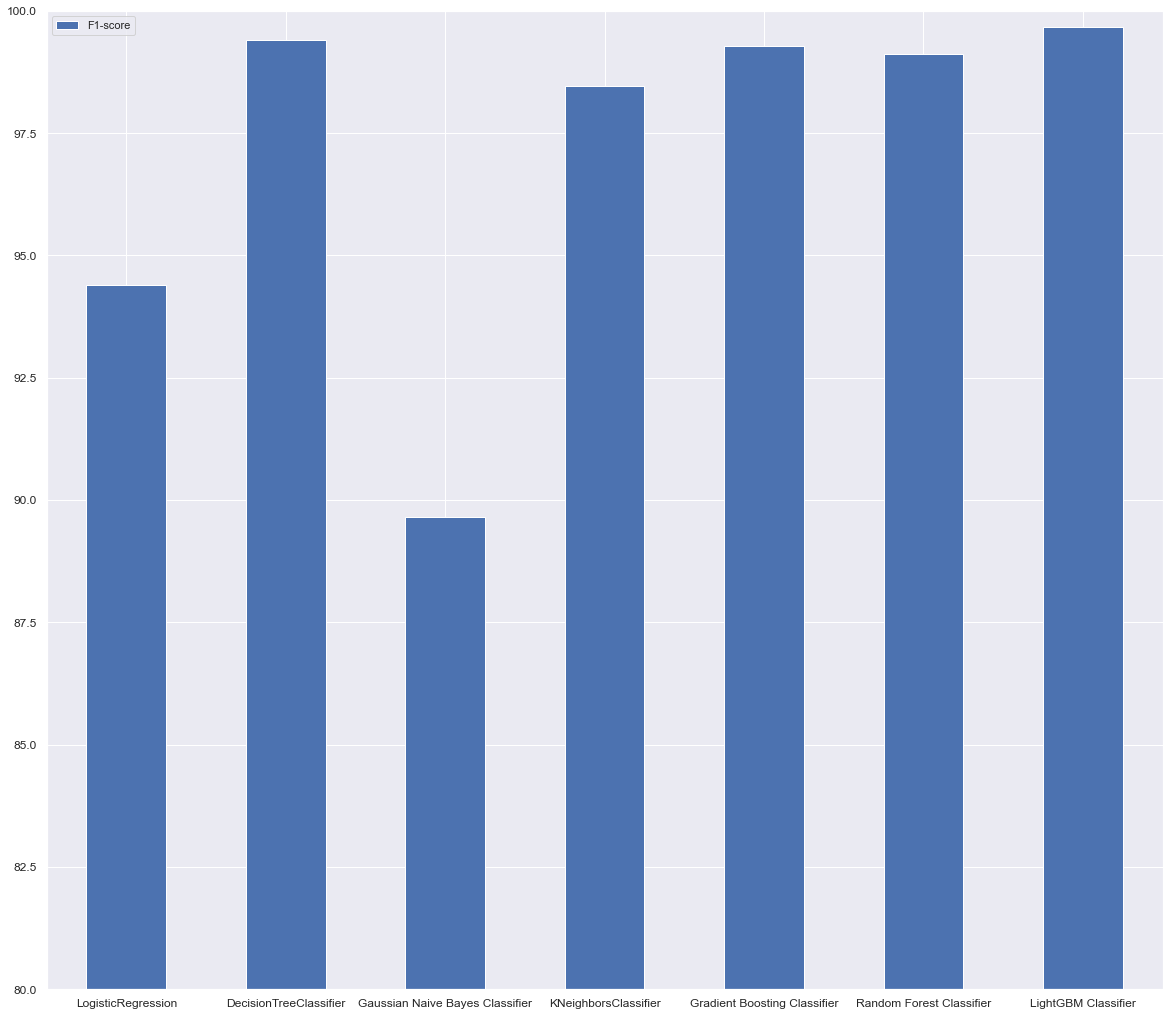

In [228]:
f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(20,18), rot=0)